# 02-1 훈련된 모델을 재사용하기

## AlexNet

In [2]:
import tensorflow as tf
import keras
from keras import layers

2023-12-10 04:25:47.360193: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-10 04:25:49.474024: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 04:25:49.474141: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 04:25:49.782345: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 04:25:50.441148: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-10 04:25:50.442037: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
alexnet = keras.models.Sequential()
alexnet.add(layers.Conv2D(filters=96, kernel_size=11, strides=4, 
                          activation='relu', input_shape=(227, 227, 3)))
alexnet.add(layers.MaxPooling2D(pool_size=3, strides=2))
alexnet.add(layers.Conv2D(filters=256, kernel_size=5, padding='same',
                          activation='relu'))
alexnet.add(layers.MaxPooling2D(pool_size=3, strides=2))
alexnet.add(layers.Conv2D(filters=384, kernel_size=3, padding='same',
                          activation='relu'))
alexnet.add(layers.Conv2D(filters=384, kernel_size=3, padding='same',
                          activation='relu'))
alexnet.add(layers.Conv2D(filters=256, kernel_size=3, padding='same',
                          activation='relu'))
alexnet.add(layers.MaxPooling2D(pool_size=3, strides=2))
alexnet.add(layers.Flatten())
alexnet.add(layers.Dense(4096, activation='relu'))
alexnet.add(layers.Dropout(0.5))
alexnet.add(layers.Dense(4096, activation='relu'))
alexnet.add(layers.Dropout(0.5))
alexnet.add(layers.Dense(1000, activation='softmax'))

2023-12-10 04:25:59.055842: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150994944 exceeds 10% of free system memory.
2023-12-10 04:25:59.256517: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150994944 exceeds 10% of free system memory.
2023-12-10 04:25:59.320743: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150994944 exceeds 10% of free system memory.
2023-12-10 04:25:59.411376: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2023-12-10 04:25:59.489284: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


In [4]:
alexnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

## VGGNet

In [5]:
vgg16 = keras.models.Sequential()
vgg16.add(layers.InputLayer(input_shape=(224, 224, 3)))

# 1, 2번째 블록
for n_filters in [64, 128]:
    for _ in range(2):
        vgg16.add(layers.Conv2D(filters=n_filters, kernel_size=3, 
                                padding='same', activation='relu'))
    vgg16.add(layers.MaxPooling2D(pool_size=2))

# 3, 4, 5번째 블록
for n_filters in [256, 512, 512]:
    for _ in range(3):
        vgg16.add(layers.Conv2D(filters=n_filters, kernel_size=3, 
                                padding='same', activation='relu'))
    vgg16.add(layers.MaxPooling2D(pool_size=2))

vgg16.add(layers.Flatten())
vgg16.add(layers.Dense(4096, activation='relu'))
vgg16.add(layers.Dense(4096, activation='relu'))
vgg16.add(layers.Dense(1000))

In [6]:
vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

In [7]:
vgg16 = keras.applications.VGG16()

In [8]:
from PIL import Image

dog_png = Image.open('images/dog.png')

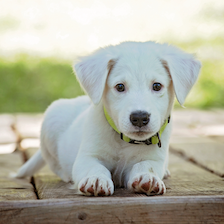

In [9]:
display(dog_png)

In [10]:
import numpy as np

dog_sample = np.array(dog_png)

In [11]:
dog_sample.shape

(224, 224, 3)

In [12]:
predictions = vgg16.predict(dog_sample[np.newaxis,:])

1/1 [==============================] - 1s 1s/step


In [13]:
max_index = np.argmax(predictions)
max_index

208

In [14]:
import requests

url = "https://storage.googleapis.com/download.tensorflow.org/" + \
      "data/imagenet_class_index.json"
json_data = requests.get(url).json()

In [15]:
json_data[str(max_index)]

['n02099712', 'Labrador_retriever']

In [16]:
keras.applications.vgg16.decode_predictions(predictions)

[[('n02099712', 'Labrador_retriever', 0.75518274),
  ('n02099601', 'golden_retriever', 0.109719954),
  ('n02093256', 'Staffordshire_bullterrier', 0.020887606),
  ('n02104029', 'kuvasz', 0.019615728),
  ('n02093428', 'American_Staffordshire_terrier', 0.015044906)]]

In [17]:
keras.applications.vgg16.decode_predictions(predictions, top=1)

[[('n02099712', 'Labrador_retriever', 0.75518274)]]

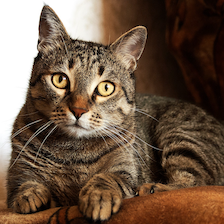

In [18]:
cat_png = Image.open('images/cat.png')
display(cat_png)

In [19]:
cat_sample = np.array(cat_png)
predictions = vgg16.predict(cat_sample[np.newaxis,:])
keras.applications.vgg16.decode_predictions(predictions)

1/1 [==============================] - 0s 372ms/step


[[('n02124075', 'Egyptian_cat', 0.35456327),
  ('n02123045', 'tabby', 0.34297514),
  ('n02123159', 'tiger_cat', 0.29677862),
  ('n02127052', 'lynx', 0.0033654126),
  ('n04040759', 'radiator', 0.00027405098)]]

In [20]:
def residual_block(x, filters=64):
    skip_conn = x
    # skip_conn의 마지막 차원을 filters*4로 맞춥니다
    if skip_conn.shape[-1] != filters*4:
        skip_conn = layers.Conv2D(filters=filters*4, kernel_size=1)(skip_conn)
        skip_conn = layers.BatchNormalization()(skip_conn)
    # 세 개의 합성곱에 필요한 필터 개수와 커널 크기를 리스트로 준비합니다
    conv_params = [(filters, 1), (filters, 3), (filters*4, 1)]
    # 합성곱과 배치 정규화, 렐루 활성화 함수를 반복합니다
    for n_filters, kernel_size in conv_params:
        x = layers.Conv2D(filters=n_filters, kernel_size=kernel_size, 
                          padding="same")(x)
        x = layers.BatchNormalization()(x)
        if (n_filters == filters*4): # 세 번째 합성곱이면 렐루 함수 전에 스킵 연결을 더합니다
            x = layers.Add()([skip_conn, x])
        x = layers.Activation('relu')(x)
    return x

In [21]:
inputs = layers.Input(shape=(224, 224, 3))
residual_input = layers.ZeroPadding2D(padding=3)(inputs)  # x의 크기는 (230, 230, 3)이 됩니다
# x는 (112, 112, 64)가 됩니다
residual_input = layers.Conv2D(filters=64, kernel_size=7, strides=2)(residual_input)

In [22]:
x = residual_input
for _ in range(3):
    x = residual_block(x, 64)

In [29]:
def residual_block(x, filters=64, stride=1):
    skip_conn = x
    # skip_conn의 마지막 차원을 filters*4로 맞춥니다
    if skip_conn.shape[-1] != filters*4:
        skip_conn = layers.Conv2D(filters=filters*4, kernel_size=1,
                                  strides=stride)(skip_conn)
        skip_conn = layers.BatchNormalization()(skip_conn)
    # 세 개의 합성곱에 필요한 필터 개수와 커널 크기를 리스트로 준비합니다
    conv_params = [(filters, 1, stride), (filters, 3, 1), (filters*4, 1, 1)]
    # 합성곱과 배치 정규화, 렐루 활성화 함수를 반복합니다
    for n_filters, kernel_size, stride in conv_params:
        x = layers.Conv2D(filters=n_filters, kernel_size=kernel_size, 
                          strides=stride, padding="same")(x)
        x = layers.BatchNormalization()(x)
        if (n_filters == filters*4): # 세 번째 합성곱이면 렐루 함수 전에 스킵 연결을 더합니다
            x = layers.Add()([skip_conn, x])
        x = layers.Activation('relu')(x)
    return x

In [34]:
resnet50 = keras.models.Model(inputs=inputs, outputs=x)
resnet50.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_3[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv2d_18 (Conv2D)          (None, 112, 112, 64)         9472      ['zero_padding2d[0][0]']      
                                                                                                  
 conv2d_30 (Conv2D)          (None, 112, 112, 64)         4160      ['conv2d_18[0][0]']     

In [20]:
resnet50 = keras.applications.ResNet50()

In [21]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       